# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


Definimos una función 'f_prueba'$ = 3x^3-2$ y un punto $x_0 = 1$ (este método recibe flotantes y devuelve flotantes para mantener la estabilidad.

In [1]:
function f_prueba(x::Float64)
    return 3*x^3 - 2
end

x0 = 1.0

1.0

Luego la función de 'derivada_derecha'.

In [2]:
function derivada_derecha(x0::Float64, h::Float64)
    f = (f_prueba(x0 + h) - f_prueba(x0))/h
    return f
end

derivada_derecha (generic function with 1 method)

Después definimos un espacio 'linspace' con 100 puntos desde $-16$ a $-2$. Hacemos esto motivados por la necesidad de dar saltos en $h$ de órdenes de magnitud. 

In [3]:
L = linspace(-16.0,-2.0,100)

linspace(-16.0,-2.0,100)

Hacemos espacio para nuestros arreglos...
Como la derivada de $3x^2 + 2$ es $9$. Definimos el error relativo:
$$e = |f'(x_0) - 9.0| $$
Y corremos en un ciclo definido sobre todos los elementos en el espacio que creamos `L` .

In [4]:
X = Float64[]
E = Float64[]
for l in collect(L)
    h = 10.0^l
    p = derivada_derecha(x0, h)
    e = abs(p - 9)
    push!(E, e )
    push!(X, h)
end

Invocamos PyPlot...

In [5]:
using PyPlot

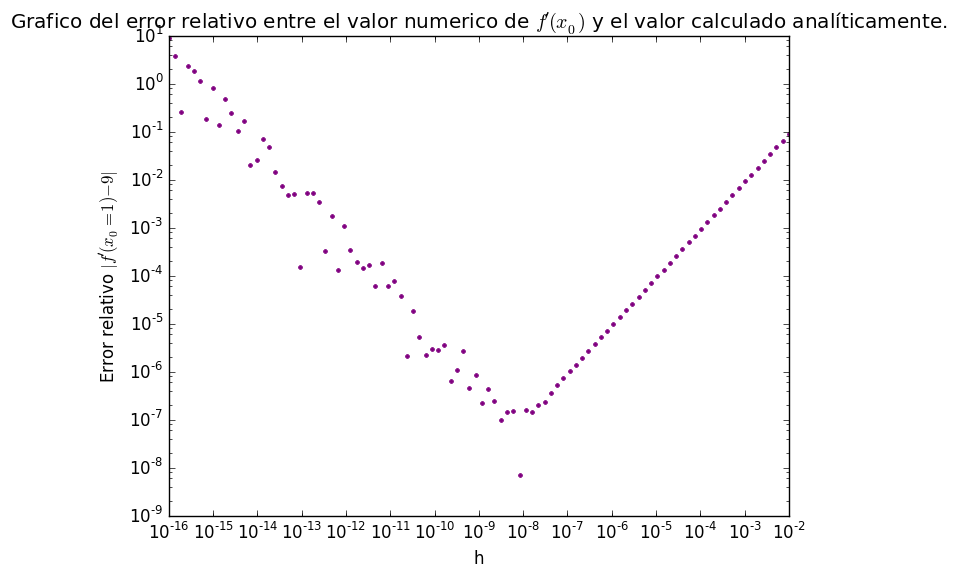

In [6]:
loglog(X,E, color="purple", ".")
ylabel(L"Error relativo $|f'(x_0 = 1) - 9|$ ")
xlabel("h")
title(L"Grafico del error relativo entre el valor numerico de $f'(x_0)$ y el valor calculado analíticamente.")
savefig("dif_der.svg")

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [7]:
function derivada_simetrica(x0::Float64, h::Float64)
    d = (f_prueba(x0 + h) - f_prueba(x0 - h))/(2*h)
    return d
end

derivada_simetrica (generic function with 1 method)

In [8]:
X2 = Float64[]
E2 = Float64[]

for l in collect(L)
    h = 10.0^l
    p = derivada_simetrica(x0, h)
    e = abs(p - 9)
    push!(X2, h)
    push!(E2, e)
end
    

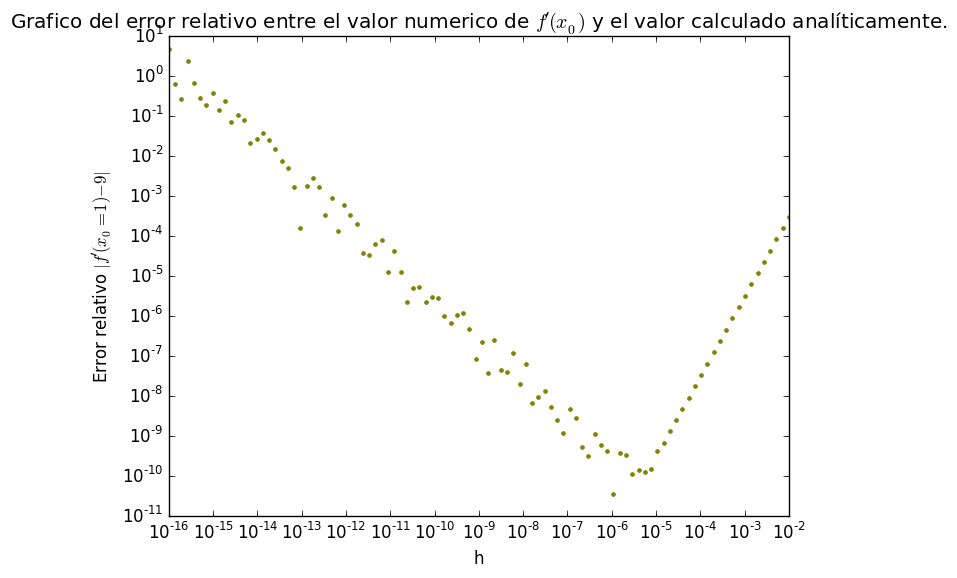

In [10]:
loglog(X2, E2, color="olive", ".")
ylabel(L"Error relativo $|f'(x_0 = 1) - 9|$ ")
xlabel("h")
title(L"Grafico del error relativo entre el valor numerico de $f'(x_0)$ y el valor calculado analíticamente.")
savefig("div_cen.svg")

## Derivada *compleja*

>Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


Hacemos lo mismo que antes...

In [11]:
function f_prueba(x::Complex)
    return 3*x^3 - 2
end

f_prueba (generic function with 2 methods)

In [12]:
function derivada_compleja(x0, h)
    d = imag(f_prueba(x0 + (h)im)/h)
    return d
end

derivada_compleja (generic function with 1 method)

In [13]:
X3 = Float64[]
E3 = Float64[]
D = Float64[]
for l in collect(L)
    h = 10.0^l
    p = derivada_compleja(x0, h)
    #println(p)
    e = abs(p - 9)
    push!(X3, h)
    push!(E3, e)
    push!(D, p)
end

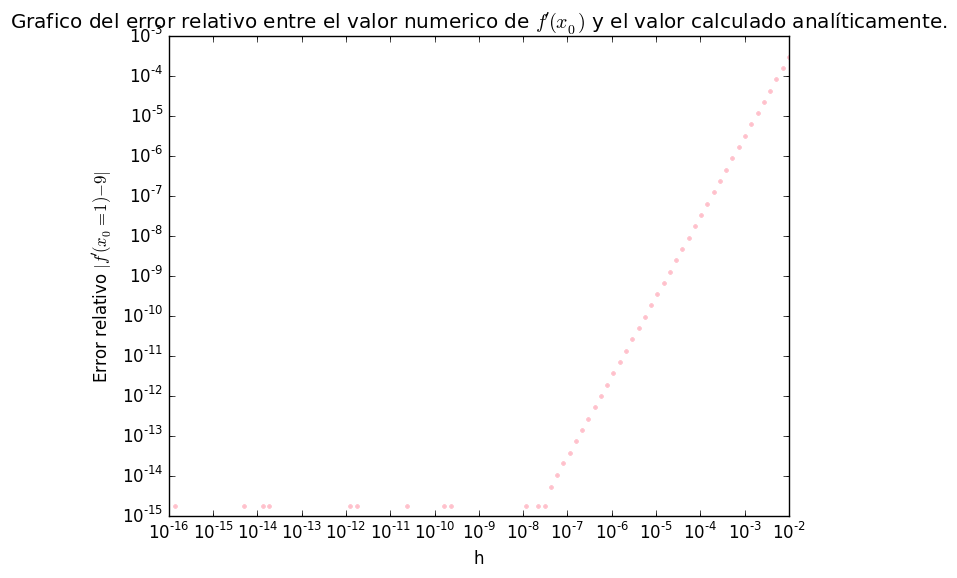

In [14]:
loglog(X3, E3, color="pink", ".")
ylabel(L"Error relativo $|f'(x_0 = 1) - 9|$ ")
xlabel("h")
title(L"Grafico del error relativo entre el valor numerico de $f'(x_0)$ y el valor calculado analíticamente.")
savefig("der_com.svg")

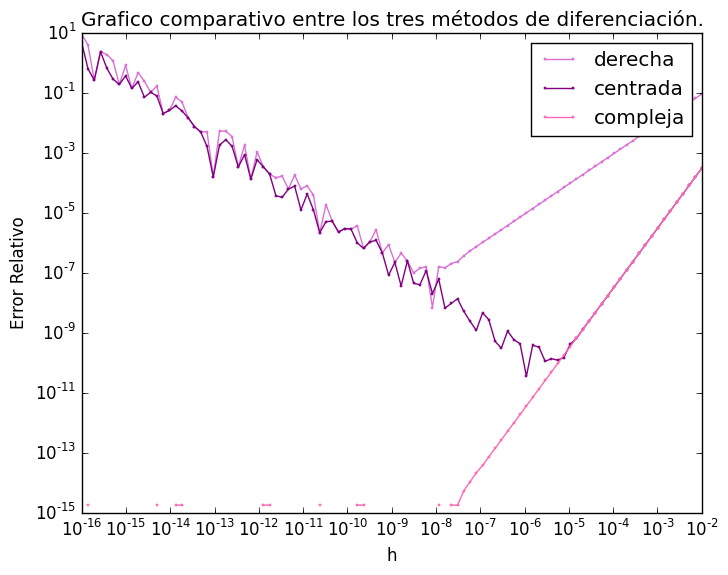

In [15]:
loglog(X,E, color = "orchid", markersize=3.0, ".-",label="derecha" )
loglog(X2,E2, color = "purple", markersize=3.0, ".-", label="centrada")
loglog(X3,E3, color="hotpink", markersize=3.0, ".-", label="compleja")
legend()

xlabel("h")
ylabel("Error Relativo")
title("Grafico comparativo entre los tres métodos de diferenciación.")
savefig("compar.svg")

## Preguntas

> - ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

En términos llanos: La __derivada compleja__. En el gráfico podemos ver cómo el error relativo disminuye hasta el orden de $10^{-15}$ En el resto sólo conseguimos aproximarnos con error mínimo de $10^{-9}$ para la derivada derecha y de $10^{-11}$.

> - ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Uno pensaría que disminuyendo el valor de $h$, el valor de la derivada se aproximaría más al calculado analíticamente ¡Pero no pasa! ¡¡NO PASAA!!. 
A excepción de la derivada compleja, para valores de $h$ muy chiquitos, los otros métodos comienzan a introducir errores de _redondeo_ en resultado, provocando que las cosas exploten y se vuelvan un tanto _inestables_. La derivada compleja es un poco más amable en este sentido.